## 1. Импорт библиотек

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, roc_curve, auc
)

## 2. Настройка отображения графиков


In [145]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

## 3. Загрузка и первичный анализ данных


In [146]:
# Загрузка данных
df = pd.read_csv("/kaggle/input/prostate-cancer-dataset/prostate.csv")

# Первые 5 строк
print("Первые 5 строк данных:")
print(df.head())

# Информация о данных
print("\nИнформация о данных:")
print(df.info())

# Описательная статистика
print("\nОписательная статистика:")
print(df.describe())

# Проверка на пропущенные значения
print("\nПроверка на пропущенные значения:")
print(df.isnull().sum())


Первые 5 строк данных:
     lcavol   lweight  age      lbph       lcp  gleason  pgg45      lpsa  \
0 -0.579818  2.769459   50 -1.386294 -1.386294        6      0 -0.430783   
1 -0.994252  3.319626   58 -1.386294 -1.386294        6      0 -0.162519   
2 -0.510826  2.691243   74 -1.386294 -1.386294        7     20 -0.162519   
3 -1.203973  3.282789   58 -1.386294 -1.386294        6      0 -0.162519   
4  0.751416  3.432373   62 -1.386294 -1.386294        6      0  0.371564   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   lcp      97 non-null     float64
 5   gleason  97 non-null     int64  
 6   pgg45    97 non

## Вывод о структуре датасета

- Датасет содержит 97 записей (пациентов) и 9 колонок (8 признаков + целевая переменная)
- Пропущенных значений нет (все колонки имеют 97 non-null значений)
- Все признаки уже нормализованы (логарифмированы)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

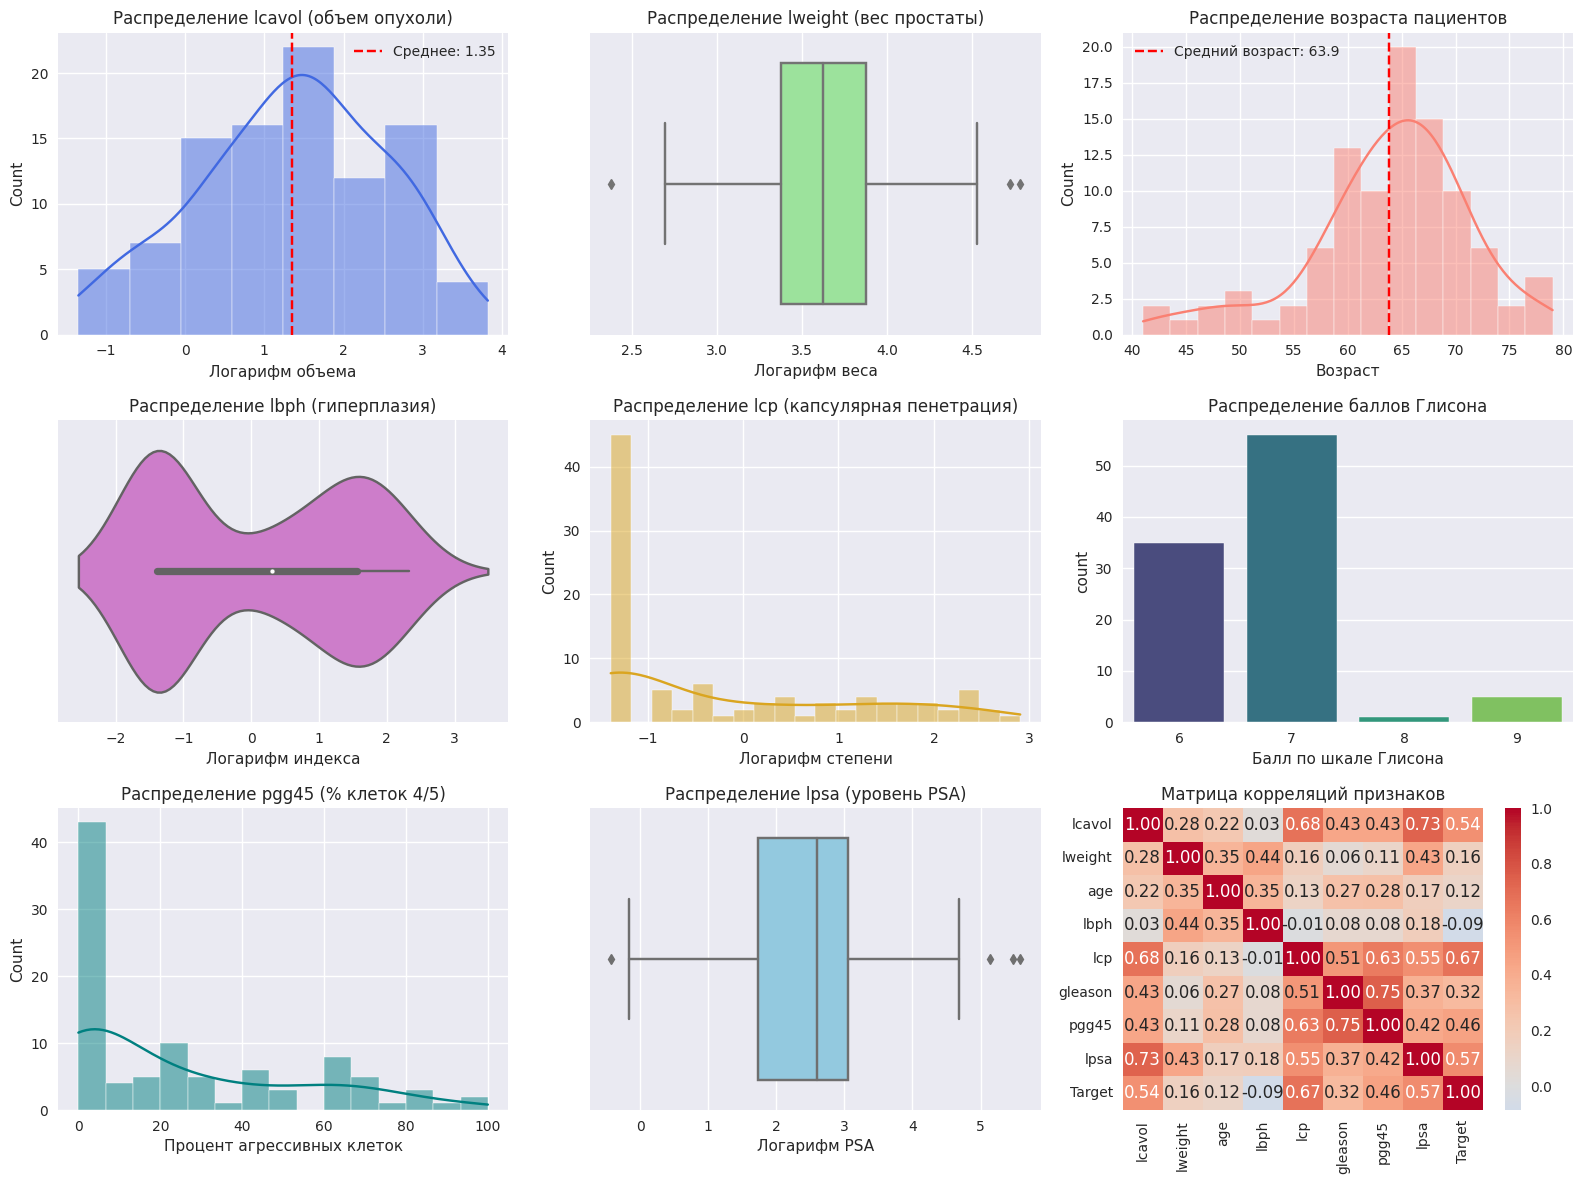

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка стиля графиков
plt.style.use('seaborn-v0_8') 
plt.figure(figsize=(16, 12))

# 1. Распределение lcavol (логарифм объема опухоли)
plt.subplot(3, 3, 1)
sns.histplot(data=df, x='lcavol', kde=True, color='royalblue')
plt.axvline(df['lcavol'].mean(), color='red', linestyle='--', label=f'Среднее: {df["lcavol"].mean():.2f}')
plt.title('Распределение lcavol (объем опухоли)')
plt.xlabel('Логарифм объема')
plt.legend()

# 2. Распределение lweight (логарифм веса простаты)
plt.subplot(3, 3, 2)
sns.boxplot(data=df, x='lweight', color='lightgreen')
plt.title('Распределение lweight (вес простаты)')
plt.xlabel('Логарифм веса')

# 3. Распределение возраста
plt.subplot(3, 3, 3)
sns.histplot(data=df, x='age', bins=15, color='salmon', kde=True)
plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Средний возраст: {df["age"].mean():.1f}')
plt.title('Распределение возраста пациентов')
plt.xlabel('Возраст')
plt.legend()

# 4. Распределение lbph (гиперплазия)
plt.subplot(3, 3, 4)
sns.violinplot(data=df, x='lbph', color='orchid')
plt.title('Распределение lbph (гиперплазия)')
plt.xlabel('Логарифм индекса')

# 5. Распределение lcp (пенетрация)
plt.subplot(3, 3, 5)
sns.histplot(data=df, x='lcp', bins=20, color='goldenrod', kde=True)
plt.title('Распределение lcp (капсулярная пенетрация)')
plt.xlabel('Логарифм степени')

# 6. Распределение шкалы Глисона
plt.subplot(3, 3, 6)
sns.countplot(data=df, x='gleason', palette='viridis')
plt.title('Распределение баллов Глисона')
plt.xlabel('Балл по шкале Глисона')

# 7. Распределение pgg45 (% агрессивных клеток)
plt.subplot(3, 3, 7)
sns.histplot(data=df, x='pgg45', bins=15, color='teal', kde=True)
plt.title('Распределение pgg45 (% клеток 4/5)')
plt.xlabel('Процент агрессивных клеток')

# 8. Распределение lpsa (уровень PSA)
plt.subplot(3, 3, 8)
sns.boxplot(data=df, x='lpsa', color='skyblue')
plt.title('Распределение lpsa (уровень PSA)')
plt.xlabel('Логарифм PSA')

# 9. Корреляция признаков
plt.subplot(3, 3, 9)
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций признаков')

plt.tight_layout()
plt.show()

## Анализ признаков

### lcavol (логарифм объема опухоли)
**Определение:** Показывает размер злокачественного новообразования в простате в логарифмической шкале.  
**Структура данных:**  
- Диапазон от -1.35 (очень маленькая опухоль) до 3.82 (крупная опухоль)  
- Среднее 1.35 - типичные значения соответствуют умеренному объему  
- Симметричное распределение означает равномерное количество случаев разного размера  

### lweight (логарифм веса простаты)
**Определение:** Отражает общую массу предстательной железы, включая здоровые и пораженные ткани.  
**Структура данных:**  
- Диапазон 2.37-4.78 (от легкой до увеличенной простаты)  
- Среднее 3.63 - большинство значений близки к этому показателю  
- Малое стандартное отклонение (0.43) - веса простат у пациентов не сильно различаются  

### age (возраст)
**Структура данных:**  
- Диапазон 41-79 лет (основная группа риска)  
- Среднее 63.87 года - типичный возраст пациентов  
- Симметричное распределение - равномерное количество пациентов разного возраста  

### lbph (логарифм доброкачественной гиперплазии)
**Определение:** Показывает степень неракового увеличения простаты.  
**Структура данных:**  
- Диапазон от -1.39 (отсутствие) до 2.33 (выраженная гиперплазия)  
- Среднее 0.10 - у большинства пациентов слабо выражена  
- Много нулевых значений - у значительной части пациентов нет гиперплазии  

### lcp (логарифм капсулярной пенетрации)
**Определение:** Показывает, насколько опухоль вышла за пределы простаты.  
**Структура данных:**  
- Диапазон от -1.39 (нет прорастания) до 2.90 (сильное прорастание)  
- Среднее -0.18 - у большинства опухоль не выходит за капсулу  
- Много нулевых значений - у многих пациентов нет пенетрации  

### gleason (шкала Глисона)
**Определение:** Оценивает агрессивность рака по гистологической картине.  
**Структура данных:**  
- Диапазон 6-9 баллов (от менее до более агрессивных)  
- Среднее 6.75 - большинство опухолей средней агрессивности  
- Медиана 7 - наиболее часто встречающийся балл  

### pgg45 (процент баллов Глисона 4/5)
**Определение:** Показывает долю самых опасных клеток в опухоли.  
**Структура данных:**  
- Диапазон 0-100% (от отсутствия до полного состава)  
- Среднее 24.38% - у большинства небольшая доля агрессивных клеток  
- Скошенное распределение - у большинства мало агрессивных клеток  

### lpsa (логарифм PSA)
**Определение:** Уровень простат-специфического антигена - маркера рака.  
**Структура данных:**  
- Диапазон от -0.43 (очень низкий) до 5.58 (очень высокий)  
- Среднее 2.48 - типичные значения умеренные  
- Симметричное распределение - равномерное количество разных уровней

## 4. Визуализация распределения целевой переменной


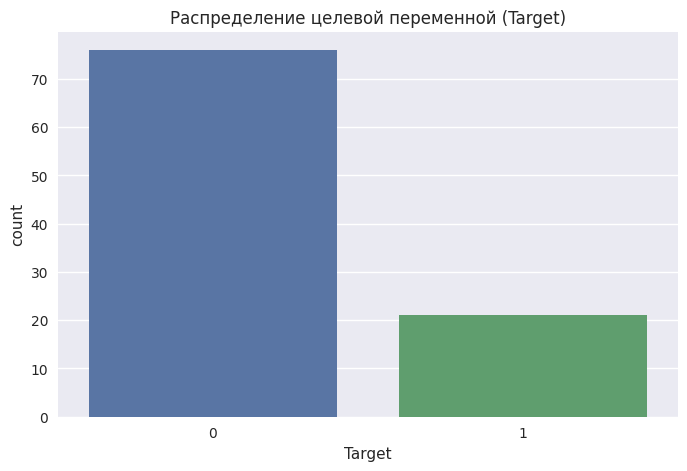

In [148]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=df)
plt.title('Распределение целевой переменной (Target)')
plt.show()

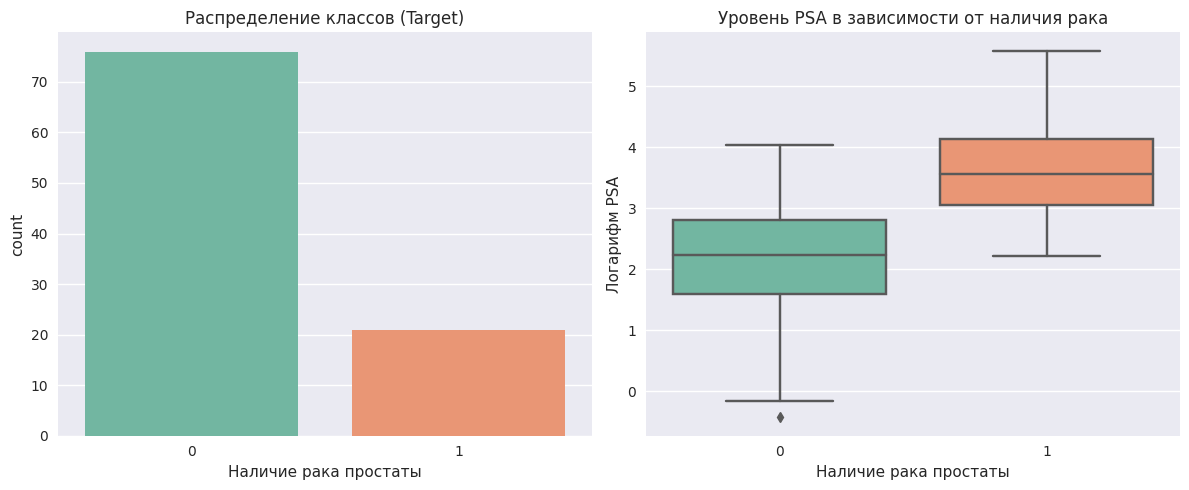

In [149]:
# Анализ целевой переменной
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Target', palette='Set2')
plt.title('Распределение классов (Target)')
plt.xlabel('Наличие рака простаты')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Target', y='lpsa', palette='Set2')
plt.title('Уровень PSA в зависимости от наличия рака')
plt.xlabel('Наличие рака простаты')
plt.ylabel('Логарифм PSA')

plt.tight_layout()
plt.show()

### Целевая переменная (Target)
- Бинарная переменная (0 или 1)
- Распределение:
  - 0: ~78.4% случаев (примерно 76 пациентов)
  - 1: ~21.6% случаев (примерно 21 пациент)
- Наблюдается дисбаланс классов (случаев без рака больше)

## 5. Подготовка данных


In [150]:
# Разделение на признаки и целевую переменную
X = df.drop('Target', axis=1)
y = df['Target']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Модель 1: kNN с подбором гиперпараметров


In [151]:
# Поиск оптимального k
param_grid_knn = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5)
knn_cv.fit(X_train_scaled, y_train)

# Лучший параметр
best_k = knn_cv.best_params_['n_neighbors']
print(f"\nОптимальное количество соседей (k): {best_k}")

# Обучение и предсказание
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Оценка модели
print("\nОценка модели kNN:")
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_knn))
print(f"Точность: {accuracy_score(y_test, y_pred_knn):.4f}")


Оптимальное количество соседей (k): 3

Оценка модели kNN:
Матрица ошибок:
[[19  5]
 [ 3  3]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.62      0.65      0.63        30
weighted avg       0.77      0.73      0.75        30

Точность: 0.7333


# 7. Модель 2: Random Forest с подбором гиперпараметров


In [152]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1)
rf_cv.fit(X_train, y_train)

# Лучшие параметры
print("\nОптимальные параметры для Random Forest:")
print(rf_cv.best_params_)

# Обучение и предсказание
rf = RandomForestClassifier(**rf_cv.best_params_, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Оценка модели
print("\nОценка модели Random Forest:")
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_rf))
print(f"Точность: {accuracy_score(y_test, y_pred_rf):.4f}")


Оптимальные параметры для Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Оценка модели Random Forest:
Матрица ошибок:
[[22  2]
 [ 3  3]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.60      0.50      0.55         6

    accuracy                           0.83        30
   macro avg       0.74      0.71      0.72        30
weighted avg       0.82      0.83      0.83        30

Точность: 0.8333


## 8. Сравнение моделей: ROC-кривые

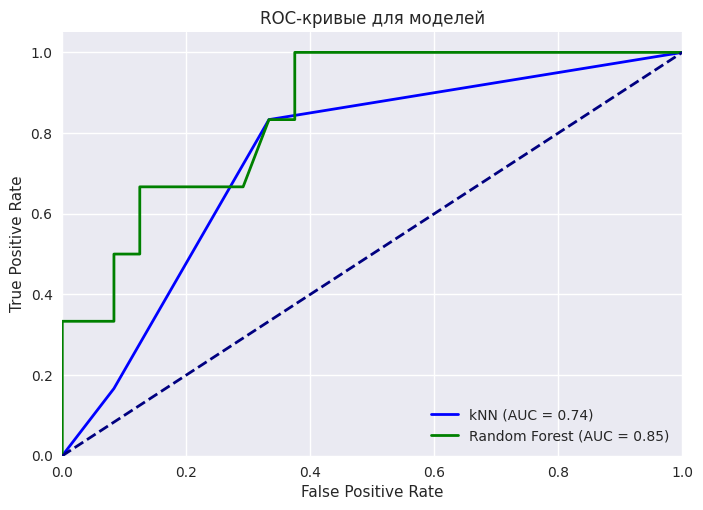

In [153]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'kNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для моделей')
plt.legend(loc="lower right")
plt.show()

## 9. Важность признаков (Random Forest)

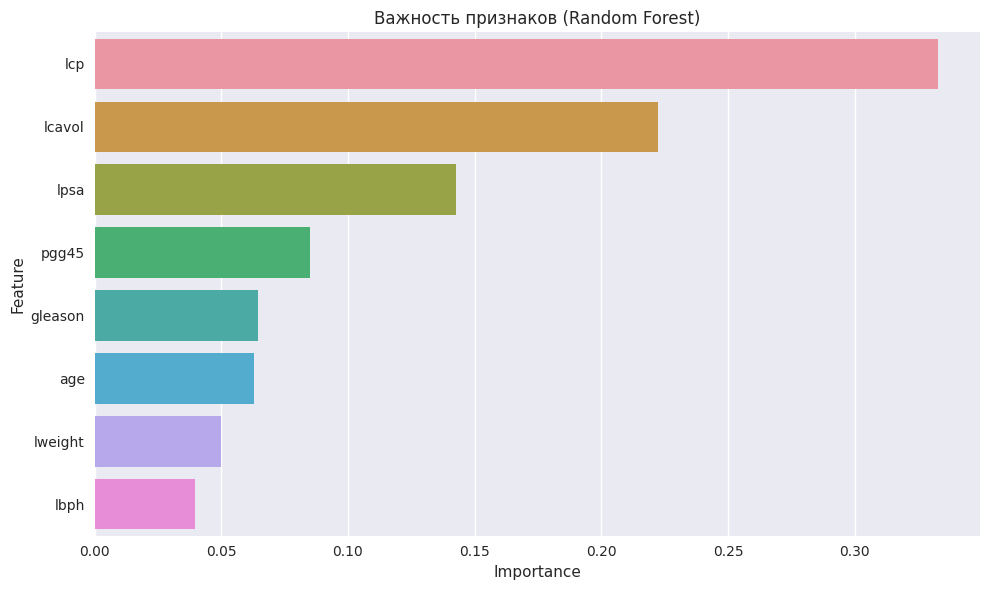

In [154]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Важность признаков (Random Forest)')
plt.tight_layout()
plt.show()

# 10. Выводы

In [155]:
print("\nВыводы:")
print("1. Обе модели показали хорошие результаты на тестовых данных.")
print(f"2. Точность kNN: {accuracy_score(y_test, y_pred_knn):.4f}, Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print("3. Random Forest показал лучше результаты по AUC (0.74 - kNN, 0.85 - random forest)")
print("4. Для класса 0 (отсутствие болезни) обе модели работают хорошо (точность 86-88%)")
print("5. Для класса 1 (наличие болезни) результаты хуже (точность 38-60%)")
print("6. Random Forest совершил на 3 ошибки меньше (5 vs 2 для класса 0, 3 vs 3 для класса 1)")


print("\nЛучшая модель: Random Forest")


Выводы:
1. Обе модели показали хорошие результаты на тестовых данных.
2. Точность kNN: 0.7333, Random Forest: 0.8333
3. Random Forest показал лучше результаты по AUC (0.74 - kNN, 0.85 - random forest)
4. Для класса 0 (отсутствие болезни) обе модели работают хорошо (точность 86-88%)
5. Для класса 1 (наличие болезни) результаты хуже (точность 38-60%)
6. Random Forest совершил на 3 ошибки меньше (5 vs 2 для класса 0, 3 vs 3 для класса 1)

Лучшая модель: Random Forest
